In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pwd

'/content'

In [ ]:
cd drive/My Drive

/content/drive/My Drive


In [ ]:
cd-

/content


In [ ]:
#san_e_new2 for sanskrit in Sanskrit-english
#eng_s_new3 for eng in Sanskrit-english

In [ ]:
#eng_hfiltered1_tok_new2.txt
#hin_efiltered1_new2.txt


In [ ]:
%load_ext rpy2.ipython


In [ ]:
# %%R
# install.packages("udpipe")

In [ ]:
pwd

'/content'

In [ ]:
# %%R
# library(udpipe)
# udmodel <- udpipe_download_model(language = "english")
# udmodel <- udpipe_load_model(file = udmodel$file_model)


In [ ]:
# %%R
# library(udpipe)
# udmodel <- udpipe_download_model(language = "english")
# udmodel <- udpipe_load_model(file = udmodel$file_model)
# #txt<-[]
# fileName <- "drive/MyDrive/Dep_parsingonlyengparseZSTGNN/eng_hfiltered1_tok_new3.txt"
# conn <- file(fileName,open="r")
# linn <-readLines(conn)
# #vector <- c()
# #print(linn[0])
# # for (i in 1:length(linn)){
#   #   vector[i]<-linn[i]
    
#   # }
# x <- udpipe_annotate(udmodel, x = linn)
#     #Encoding(x$conllu)
# #x <- as.data.frame(x, detailed = TRUE)
# #x
# cat(x$conllu, file = "drive/MyDrive/Dep_parsingonlyengparseZSTGNN/eng_h.conllu")

In [ ]:
# %%R
# library(udpipe)
# dl <- udpipe_download_model(language = "sanskrit")
# str(dl)

In [ ]:
# ls

In [ ]:
# #for sanskrit test file
# %%R
# library(udpipe)
# dl <- udpipe_download_model(language = "sanskrit", udpipe_model_repo = "jwijffels/udpipe.models.ud.2.0")
# udmodel_sanskrit <- udpipe_load_model(file = dl$file_model)
# #txt<-[]
# fileName <- "drive/MyDrive/Dep_parsingonlyengparseZSTGNN/san_test1_new1.txt"
# conn <- file(fileName,open="r")
# linn <-readLines(conn)
# #vector <- c()
# #print(linn[0])
# # for (i in 1:length(linn)){
# #      x<-linn[i]
    
#   # }
# x <- udpipe_annotate(udmodel_sanskrit, x = linn)
#     #Encoding(x$conllu)
# #x <- as.data.frame(x, detailed = TRUE)
# #Encoding(x$conllu)
# cat(x$conllu, file = "drive/MyDrive/Dep_parsingonlyengparseZSTGNN/san_test.conllu")

In [ ]:
# %%R
# library(udpipe)
# dl <- udpipe_download_model(language = "sanskrit", udpipe_model_repo = "jwijffels/udpipe.models.ud.2.0")
# udmodel_sanskrit <- udpipe_load_model(file = dl$file_model)
# #txt<-[]
# fileName <- "drive/MyDrive/Dep_parsingonlyengparseZSTGNN/san_efiltered3_tok.txt"
# conn <- file(fileName,open="r")
# linn <-readLines(conn)
# #vector <- c()
# #print(linn[0])
# # for (i in 1:length(linn)){
# #      x<-linn[i]
    
#   # }
# x <- udpipe_annotate(udmodel_sanskrit, x = linn)
#     #Encoding(x$conllu)
# #x <- as.data.frame(x, detailed = TRUE)
# #Encoding(x$conllu)
# cat(x$conllu, file = "drive/MyDrive/Dep_parsingonlyengparseZSTGNN/san_e.conllu")

In [ ]:
!pip install conllu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import conllu
import unicodedata, re
from collections import deque
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
pwd

'/content'

In [ ]:
!pip install indic-nlp-library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/anoopkunchukuttan/indic_nlp_library.git


fatal: destination path 'indic_nlp_library' already exists and is not an empty directory.


In [ ]:
import sys
from indicnlp import common

# The path to the local git repo for Indic NLP library
INDIC_NLP_LIB_HOME=r"indic_nlp_library"

# The path to the local git repo for Indic NLP Resources
INDIC_NLP_RESOURCES=r"indic_nlp_resources"

# Add library to Python path
sys.path.append(r'{}\src'.format(INDIC_NLP_LIB_HOME))

# Set environment variable for resources folder
common.set_resources_path(INDIC_NLP_RESOURCES)

In [ ]:
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git


fatal: destination path 'indic_nlp_resources' already exists and is not an empty directory.


In [ ]:
#for target test file (hindi test file)
import indicnlp
from indicnlp.tokenize import indic_tokenize  
from indicnlp.tokenize import sentence_tokenize

hinditext_file = open("drive/MyDrive/Dep_parsingonlyengparseZSTGNN/hin_test_new1.txt", "r", encoding="utf-8")
#hindilines=hinditext_file.read()
hindilines=hinditext_file.readlines()
print(len(hindilines))
tokens=[]
tokens1=[]
hin_sent_tok=[]
#red_count=188
#print('Input String: {}'.format(indic_string))
#print('Tokens: ')
for i in range(len(hindilines)):
  hindilines1="sos " + hindilines[i].strip("\n")+ " eos"
  #print(hindilines1)
  tokens.append([])
  for t in indic_tokenize.trivial_tokenize(hindilines1): 
    tokens[i].append(t)
  
  hin_sent_tok.append(sentence_tokenize.sentence_split(hindilines1, lang='hi'))
  # red_count-=1
  # if red_count<=0:
  #   break;
hin_test=tokens
print(hin_test)
#print(hin_sent_tok)

148
[['sos', 'सभी', 'वचन', 'निभायेंगे', 'मंत्री', 'श्री', 'शर्मा', 'eos'], ['sos', 'जनसम्पर्क', 'मंत्री', 'श्री', 'पीसी', 'शर्मा', 'ने', 'कर्मचारियों', 'के', 'साथ', 'किये', 'गये', 'सभी', 'वचनों', 'को', 'पूरा', 'करने', 'की', 'बात', 'कही', 'है', '।', 'श्री', 'शर्मा', 'मध्यप्रदेश', 'सहायक', 'पशु', 'चिकित्सा', 'क्षेत्र', 'अधिकारी', 'संघ', 'के', 'प्रांतीय', 'अधिवेशन', 'को', 'संबोधित', 'कर', 'रहे', 'थे', '।', 'उन्होंने', 'कहा', 'कि', 'कर्मचारियों', 'की', 'जो', 'भी', 'मांगें', 'हैं', 'उन', 'सभी', 'को', 'पूरा', 'किया', 'जायेगा', '।', 'eos'], ['sos', 'मूल', 'धर्म', 'सेवाभाव', 'है', 'eos'], ['sos', 'माँ', 'नर्मदा', 'जयंती', 'महोत्सव', 'में', 'मंत्री', 'श्री', 'पीसी', 'शर्मा', 'eos'], ['sos', 'स्नेह', 'सम्मेलन', 'का', 'पुरस्कार', 'वितरण', 'समारोह', 'eos'], ['sos', 'कॉलेज', 'की', 'छात्राएँ', 'भी', 'महारानी', 'लक्ष्मीबाई', 'स्वरूपा', 'हैं', 'मंत्री', 'श्री', 'शर्मा', 'eos'], ['sos', 'महाविद्यालय', 'की', 'छात्राओं', 'ने', 'जिस', 'प्रकार', 'से', 'देशप्रदेश', 'में', 'भोपाल', 'को', 'गौरवान्वित', 'किया'

In [ ]:
print(len(hin_test))

148


In [ ]:
#for source test file (sankrit test file)
import indicnlp
from indicnlp.tokenize import indic_tokenize  
from indicnlp.tokenize import sentence_tokenize

hinditext_file = open("drive/MyDrive/Dep_parsingonlyengparseZSTGNN/san_test1_new1.txt", "r", encoding="utf-8")
#hindilines=hinditext_file.read()
sanlines=hinditext_file.readlines()
tokens=[]
tokens1=[]
hin_sent_tok=[]
#red_count=188
#print('Input String: {}'.format(indic_string))
#print('Tokens: ')
for i in range(len(sanlines)):
  hindilines1=sanlines[i].strip("\n")
  #print(hindilines1)
  tokens.append([])
  for t in indic_tokenize.trivial_tokenize(hindilines1): 
    tokens[i].append(t)
  
  hin_sent_tok.append(sentence_tokenize.sentence_split(hindilines1, lang='hi'))
  # red_count-=1
  # if red_count<=0:
  #   break;
san_test=tokens
print(san_test)
#print(hin_sent_tok)

[['hi', 'सर्वेषां', 'वचनानां', 'निर्वहणं', 'करिष्याम', 'मंत्री', 'श्री', 'शर्मा'], ['hi', 'जनसम्पर्कं', 'मंत्री', 'श्री', 'पीसी', 'शर्मा', 'कर्मचारिभि', 'सह', 'सर्वेषां', 'वचनानां', 'पूर्णं', 'कर्तुं', 'वार्ता', 'अकथयत्', '।', 'श्री', 'शर्मा', 'मध्य', 'प्रदेशं', 'सहायक', 'पशु', 'चिकित्सा', 'क्षेत्रम्', 'अधिकारी', 'संघस्य', 'प्रांतीयम्', 'अधिवेशनं', 'संबोधयन्', 'आसीत्', '।', 'स', 'उक्तवान्', 'यत्', 'कर्मचारीणां', 'या', 'अपि', 'याचना', 'सन्ति', 'ता', 'सर्वा', 'पूर्णा', 'कारयिष्यते', '।'], ['hi', 'मूल', 'धर्म', 'सेवा', 'भाव', 'अस्ति'], ['hi', 'माँ', 'नर्मदा', 'जयन्ती', 'महोत्सवे', 'मंत्री', 'श्री', 'पीसी', 'शर्मा'], ['hi', 'स्नेहं', 'सम्मेलनस्य', 'पुरस्कारं', 'वितरणं', 'समारोह'], ['hi', 'महाविद्यालयस्य', 'छात्रा', 'महाराज्ञी', 'लक्ष्मीबाई', 'स्वरूपा', 'सन्ति', 'मंत्री', 'श्री', 'शर्मा'], ['hi', 'महाविद्यालयस्य', 'छात्रा', 'यथा', 'देशे', 'प्रदेशयो', 'भोपालं', 'गौरवान्वितं', 'कृतवत्य', 'वयं', 'कथयितुं', 'शक्नुम', 'यत्', 'महाविद्यालयस्य', 'छात्रा', 'अपि', 'महाराज्ञी', 'लक्ष्मीबाई', 'स्वरूपा'

In [ ]:

import indicnlp
from indicnlp.tokenize import indic_tokenize  
from indicnlp.tokenize import sentence_tokenize

hinditext_file = open("drive/MyDrive/Dep_parsingonlyengparseZSTGNN/hin_efiltered1_new3.txt", "r", encoding="utf-8")
#hindilines=hinditext_file.read()
hindilines=hinditext_file.readlines()
hin_etokens=[]
tokens1=[]
hin_sent_tok=[]
#red_count=num_lines
#print('Input String: {}'.format(indic_string))
#print('Tokens: ')
j=0
k=5000
for i in range(j,k):

#for i in range(len(hindilines)):
  hindilines1="sos " + hindilines[i].strip("\n")+ " eos"
  #print(hindilines1)
  hin_etokens.append([])
  for t in indic_tokenize.trivial_tokenize(hindilines1): 
    hin_etokens[i].append(t)
  
  hin_sent_tok.append(sentence_tokenize.sentence_split(hindilines1, lang='hi'))
  # red_count-=1
  # if red_count<=0:
  #   break;
#hin_etokens=tokens
print(hin_etokens)
print(len(hindilines))
  

[['sos', 'अपने', 'अनुप्रयोग', 'को', 'पहुंचनीयता', 'व्यायाम', 'का', 'लाभ', 'दें', 'eos'], ['sos', 'एक्सेर्साइसर', 'पहुंचनीयता', 'अन्वेषक', 'eos'], ['sos', 'निचले', 'पटल', 'के', 'लिए', 'डिफोल्ट', 'प्लगइन', 'खाका', 'eos'], ['sos', 'ऊपरी', 'पटल', 'के', 'लिए', 'डिफोल्ट', 'प्लगइन', 'खाका', 'eos'], ['sos', 'उन', 'प्लगइनों', 'की', 'सूची', 'जिन्हें', 'डिफोल्ट', 'रूप', 'से', 'निष्क्रिय', 'किया', 'गया', 'है', 'eos'], ['sos', 'अवधि', 'को', 'हाइलाइट', 'रकें', 'eos'], ['sos', 'पहुंचनीय', 'आसंधि', 'नोड', 'को', 'चुनते', 'समय', 'हाइलाइट', 'बक्से', 'की', 'अवधि', 'eos'], ['sos', 'सीमांत', 'बोर्डर', 'के', 'रंग', 'को', 'हाइलाइट', 'करें', 'eos'], ['sos', 'हाइलाइट', 'किए', 'गए', 'सीमांत', 'का', 'रंग', 'और', 'अपारदर्शिता', '।', 'eos'], ['sos', 'भराई', 'के', 'रंग', 'को', 'हाइलाइट', 'करें', 'eos'], ['sos', 'हाइलाइट', 'किया', 'गया', 'भराई', 'का', 'रंग', 'और', 'पारदर्शिता', '।', 'eos'], ['sos', 'एपीआई', 'विचरक', 'eos'], ['sos', 'इस', 'समय', 'जिसे', 'प्राप्त', 'किया', 'गया', 'हो', 'उसकी', 'विभिन्न', 'विधियों', 'मे

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
eng_sent_tokens=[]
eng_stokens=[]
engtext_file = open("drive/MyDrive/Dep_parsingonlyengparseZSTGNN/eng_sfiltered3.txt", "r", encoding="utf-8")
#engtext_file = open("drive/MyDrive/Dep_parsingonlyengparseZSTGNN/itihasa-main/data/train.en", "r", encoding="utf-8")
#hindilines=hinditext_file.read()
englines=engtext_file.readlines()
#red_count=num_lines
j=0
k=5000
for i in range(j,k):

#for i in range(len(englines)):
  englines1="sos " + englines[i] + " eos"
  eng_stokens.append([])
  for t in word_tokenize(englines1): 
    eng_stokens[i].append(t)
  eng_sent_tokens.append(sent_tokenize(englines[i]))
  # red_count-=1
  # if red_count<=0:
  #   break;
print(eng_stokens)
#print(eng_sent_tokens)

[['sos', 'dhrtarastra', 'said', 'o', 'sanjaya', 'what', 'did', 'my', 'men', 'and', 'the', 'sons', 'of', 'pandu', 'do', 'in', 'the', 'kuruksetra', 'the', 'field', 'of', 'righteousness', 'where', 'the', 'entire', 'warring', 'class', 'has', 'assembled', 'oro', 'sanjaya', 'what', 'did', 'the', 'selfish', 'intentions', 'and', 'the', 'intentions', 'born', 'of', 'wisdom', 'do', 'in', 'the', 'human', 'body', 'which', 'is', 'the', 'fieldofduties', 'the', 'repository', 'of', 'the', 'senseorgans', 'and', 'in', 'which', 'all', 'the', 'murderous', 'ones', 'passions', 'and', 'asceticism', 'etc', 'are', 'confronting', 'each', 'other', 'eos'], ['sos', 'sanjaya', 'said', 'seeing', 'the', 'army', 'of', 'the', 'sons', 'of', 'pandu', 'marshalled', 'in', 'the', 'military', 'array', 'the', 'prince', 'duryodhana', 'approached', 'the', 'teacher', 'drona', 'and', 'spoke', 'at', 'that', 'time', 'these', 'words', 'eos'], ['sos', 'o', 'teacher', 'behold', 'this', 'mighty', 'army', 'of', 'the', 'sons', 'of', 'pand

In [ ]:
print(len(eng_stokens))

5000


In [ ]:
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
#eng_sent_tokens=[]
san_etokens=[]
#engtext_file = open("drive/MyDrive/Dep_parsingonlyengparseZSTGNN/itihasa-main/data/train.sn", "r", encoding="utf-8")
engtext_file = open("drive/MyDrive/Dep_parsingonlyengparseZSTGNN/san_efiltered3_tok.txt", "r", encoding="utf-8")
#hindilines=hinditext_file.read()
englines=engtext_file.readlines()
#red_count=num_lines
j=0
k=5000
for i in range(j,k):

#for i in range(len(englines)):
  englines1= "en "+ englines[i] 
  san_etokens.append([])
  for t in word_tokenize(englines1): 
    san_etokens[i].append(t)
  eng_sent_tokens.append(sent_tokenize(englines[i]))
  # red_count-=1
  # if red_count<=0:
  #   break;
print(san_etokens)
print(len(englines))

[['en', 'धृतराष्ट्र', 'उवाच', 'धर्मक्षेत्रे', 'कुरुक्षेत्रे', 'समवेता', 'युयुत्सवः।', 'मामकाः', 'पाण्डवाश्चैव', 'किमकुर्वत', 'सञ्जय।।'], ['en', 'सञ्जय', 'उवाच', 'दृष्ट्वा', 'तु', 'पाण्डवानीकं', 'व्यूढं', 'दुर्योधनस्तदा।', 'आचार्यमुपसङ्गम्य', 'राजा', 'वचनमब्रवीत्।।'], ['en', 'पश्यैतां', 'पाण्डुपुत्राणामाचार्य', 'महतीं', 'चमूम्।', 'व्यूढां', 'द्रुपदपुत्रेण', 'तव', 'शिष्येण', 'धीमता।।'], ['en', 'अत्र', 'शूरा', 'महेष्वासा', 'भीमार्जुनसमा', 'युधि।', 'युयुधानो', 'विराटश्च', 'द्रुपदश्च', 'महारथः।।'], ['en', 'धृष्टकेतुश्चेकितानः', 'काशिराजश्च', 'वीर्यवान्।', 'पुरुजित्कुन्तिभोजश्च', 'शैब्यश्च', 'नरपुङ्गवः।।'], ['en', 'युधामन्युश्च', 'विक्रान्त', 'उत्तमौजाश्च', 'वीर्यवान्।', 'सौभद्रो', 'द्रौपदेयाश्च', 'सर्व', 'एव', 'महारथाः।।'], ['en', 'अस्माकं', 'तु', 'विशिष्टा', 'ये', 'तान्निबोध', 'द्विजोत्तम।', 'नायका', 'मम', 'सैन्यस्य', 'संज्ञार्थं', 'तान्ब्रवीमि', 'ते।।'], ['en', 'भवान्भीष्मश्च', 'कर्णश्च', 'कृपश्च', 'समितिञ्जयः।', 'अश्वत्थात्मा', 'विकर्णश्च', 'सौमदत्तिस्तथैव', 'च।।'], ['en', 'अन्ये', 'च', 

In [ ]:
print(san_etokens[1])

['en', 'सञ्जय', 'उवाच', 'दृष्ट्वा', 'तु', 'पाण्डवानीकं', 'व्यूढं', 'दुर्योधनस्तदा।', 'आचार्यमुपसङ्गम्य', 'राजा', 'वचनमब्रवीत्।।']


In [ ]:
print(len(san_etokens))

5000


In [ ]:
print(san_etokens[0])

['en', 'धृतराष्ट्र', 'उवाच', 'धर्मक्षेत्रे', 'कुरुक्षेत्रे', 'समवेता', 'युयुत्सवः।', 'मामकाः', 'पाण्डवाश्चैव', 'किमकुर्वत', 'सञ्जय।।']


In [ ]:
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize
#eng_sent_tokens=[]
eng_htokens=[]
engtext_file = open("drive/MyDrive/Dep_parsingonlyengparseZSTGNN/eng_hfiltered1_tok_new3.txt", "r", encoding="utf-8")
#hindilines=hinditext_file.read()
englines=engtext_file.readlines()
#red_count=num_lines
j=0
k=5000
for i in range(j,k):

#for i in range(len(englines)):
  englines1= englines[i] 
  eng_htokens.append([])
  for t in word_tokenize(englines1): 
    eng_htokens[i].append(t + ' ')
  #eng_sent_tokens.append(sent_tokenize(englines[i]))
  # red_count-=1
  # if red_count<=0:
  #   break;
print(eng_htokens)
print(len(englines))

[['hi ', 'give ', 'your ', 'application ', 'an ', 'accessibility ', 'workout '], ['hi ', 'accerciser ', 'accessibility ', 'explorer '], ['hi ', 'the ', 'default ', 'plugin ', 'layout ', 'for ', 'the ', 'bottom ', 'panel '], ['hi ', 'the ', 'default ', 'plugin ', 'layout ', 'for ', 'the ', 'top ', 'panel '], ['hi ', 'a ', 'list ', 'of ', 'plugins ', 'that ', 'are ', 'disabled ', 'by ', 'default '], ['hi ', 'highlight ', 'duration '], ['hi ', 'the ', 'duration ', 'of ', 'the ', 'highlight ', 'box ', 'when ', 'selecting ', 'accessible ', 'nodes '], ['hi ', 'highlight ', 'border ', 'color '], ['hi ', 'the ', 'color ', 'and ', 'opacity ', 'of ', 'the ', 'highlight ', 'border '], ['hi ', 'highlight ', 'fill ', 'color '], ['hi ', 'the ', 'color ', 'and ', 'opacity ', 'of ', 'the ', 'highlight ', 'fill '], ['hi ', 'api ', 'browser '], ['hi ', 'browse ', 'the ', 'various ', 'methods ', 'of ', 'the ', 'current ', 'accessible '], ['hi ', 'hide ', 'private ', 'attributes '], ['hi ', 'ipython ', 'c

In [ ]:
target_train_tokens=[]
for i in eng_stokens:
  target_train_tokens.append(i)

In [ ]:
for i in hin_etokens:
  target_train_tokens.append(i)

In [ ]:
target_tokens=[]
for i in eng_stokens:
  target_tokens.append(i)
print(len(eng_sent_tokens))


10000


In [ ]:
print(len(target_tokens))

5000


In [ ]:
#target_tokens=[]
for i in hin_etokens:
  target_tokens.append(i)
print(len(hin_etokens))

5000


In [ ]:
for i in hin_test:
  target_tokens.append(i)

In [ ]:
print(len(target_tokens))

10148


In [ ]:
def preorderTraversal(root):
    word_order = {} # as we don't get the original sentence token order using parsetree
    Stack = deque([])
    # 'Preorder'-> contains all the
    # visited nodes.
    Preorder =[]
    Preorder.append(root.token['form'])
    word_order[root.token['form']] = root.token['id']
    Stack.append(root)
    while len(Stack)>0:
        flag = 0
        if len((Stack[len(Stack)-1]).children)== 0:
            X = Stack.pop()
        else:
            Par = Stack[len(Stack)-1]
        for i in range(0, len(Par.children)):
            if Par.children[i].token['form'] not in Preorder:
                flag = 1
                Stack.append(Par.children[i])
                Preorder.append(Par.children[i].token['form'])
                word_order[Par.children[i].token['form']] = Par.children[i].token['id']
                break;
        if flag == 0:
            Stack.pop()
    # print(Preorder)
    return Preorder, word_order

def postorderTraversal(root):
    word_order = {} # as we don't get the original sentence token order using parsetree
    Postorder =[]
    if not root:
        return []
    Stack = [root]
    last = None

    while Stack:
        root = Stack[-1]
        if not root.children or last and (last in root.children):
            Postorder.append(root.token['form'])
            word_order[root.token['form']] = root.token['id']
            Stack.pop()
            last = root
        else:
            for children in root.children[::-1]:
                Stack.append(children)
    # print(Postorder)
    return Postorder, word_order

In [ ]:
global_word2token = {}
global_edge_list = []

global_word2token['<pad>'] = 0
global_id_counter = 1

def DFSUtil(v, visited):
    global global_id_counter
    visited.add(v.token['id'])
    if v.token['form'] in global_word2token:
        global_id = global_word2token[v.token['form']]
    else:
        global_id = global_id_counter
        global_id_counter += 1
        global_word2token[v.token['form']] = global_id
    print(v.token['form'], end=' ')

    for neighbour in v.children:
        if neighbour.token['id'] not in visited:
            if neighbour.token['form'] in global_word2token:
                global_id_neighbour = global_word2token[neighbour.token['form']]
            else:
                global_id_neighbour = global_id_counter
                global_id_counter += 1
                global_word2token[neighbour.token['form']] = global_id_neighbour
            global_edge_list.append([global_id, global_id_neighbour])
            DFSUtil(neighbour, visited)

def DFS(v):
    visited = set()
    DFSUtil(v, visited)

In [ ]:
data_file = open("drive/MyDrive/Dep_parsingonlyengparseZSTGNN/san_test.conllu", "r", encoding="utf-8")
all_corpus_text_test_s=[]
all_corpus_index_test_order_s=[]
all_corpus_text_test_s_gnn = []
reduce_count=148

for tokentree in conllu.parse_tree_incr(data_file):
  print(tokentree)
  print(tokentree.print_tree())
  print(tokentree.metadata['text'])
  try:
    pre_order, normal_order  = preorderTraversal(tokentree)
    DFS(tokentree)
  except Exception:
    continue
  post_order, _ = postorderTraversal(tokentree)
  normal_order = sorted(normal_order, key=normal_order.get) # sort values and get the key, i.e., words
  normal_order = [w.lower() for w in normal_order]
  pre_order = [w.lower() for w in pre_order]
  post_order = [w.lower() for w in post_order]
  node_indices = [global_word2token[w] for w in normal_order]

  print("Normal: ", normal_order, "\nPre-order: ", pre_order, "\nPost-order: ", post_order, "\nGNN involved node indices: ", node_indices)

  pre_order_index_input = np.array([pre_order.index(item) for item in normal_order]).reshape(-1,)
  post_order_index_input = np.array([post_order.index(item) for item in normal_order]).reshape(-1,)
  print("\nPre-orderindex: ", pre_order_index_input, "\nPost-orderindex: ", post_order_index_input)
  
  all_corpus_text_test_s.append([normal_order,pre_order,post_order])
  all_corpus_text_test_s_gnn.append(node_indices)
  all_corpus_index_test_order_s.append([pre_order_index_input,post_order_index_input])

  reduce_count-=1
  if reduce_count<=0:
    break


TokenTree<token={id=5, form=करिष्याम}, children=[...]>
(deprel:root) form:करिष्याम lemma:करिष्यम upos:NOUN [5]
    (deprel:nmod) form:hi lemma:hi upos:NOUN [1]
    (deprel:nmod) form:वचनानां lemma:वचनाना upos:NOUN [3]
        (deprel:amod) form:सर्वेषां lemma:सर्वेषा् upos:ADJ [2]
    (deprel:amod) form:निर्वहणं lemma:निर्वहण् upos:ADJ [4]
None
hi सर्वेषां वचनानां निर्वहणं करिष्याम
करिष्याम hi वचनानां सर्वेषां निर्वहणं Normal:  ['hi', 'सर्वेषां', 'वचनानां', 'निर्वहणं', 'करिष्याम'] 
Pre-order:  ['करिष्याम', 'hi', 'वचनानां', 'सर्वेषां', 'निर्वहणं'] 
Post-order:  ['hi', 'सर्वेषां', 'वचनानां', 'निर्वहणं', 'करिष्याम'] 
GNN involved node indices:  [2, 4, 3, 5, 1]

Pre-orderindex:  [1 3 2 4 0] 
Post-orderindex:  [0 1 2 3 4]
TokenTree<token={id=3, form=शर्मा}, children=[...]>
(deprel:root) form:शर्मा lemma:शर्म upos:NOUN [3]
    (deprel:nmod) form:श्री lemma:श्रिन् upos:NOUN [2]
        (deprel:nmod) form:मंत्री lemma:मंत्रिन् upos:NOUN [1]
None
मंत्री श्री शर्मा
शर्मा श्री मंत्री Normal:  ['म

In [ ]:
global_id_counter

785

In [ ]:
###save normal,pre,post as san sentence)

all_corpus_text_test_s=[]
for i in range(len(san_test)):
  all_corpus_text_test_s.append([san_test[i],san_test[i],san_test[i]])
#### storing index###Pre Post###

z=0
p=0
index0=[]
for i in san_test:

  index0.append([])
  for word in i:
    index=z
    index0[p].append(index)  
    z=z+1
    if z==len(i):
      z=0
  p=p+1
index1=[]
for i in index0:
  array=np.array(i)
  index1.append(array)
all_corpus_index_test_order_s=[]
for i in index1:
  all_corpus_index_test_order_s.append([i,i])

In [ ]:
data_file = open("drive/MyDrive/Dep_parsingonlyengparseZSTGNN/san_e.conllu", "r", encoding="utf-8")
all_corpus_text_s=[]
all_corpus_text_s_gnn=[]
all_corpus_index_order_s=[]
reduce_count=5000

for tokentree in conllu.parse_tree_incr(data_file):
  print(tokentree)
  print(tokentree.print_tree())
  print(tokentree.metadata['text'])
  try:
    pre_order, normal_order  = preorderTraversal(tokentree)
    DFS(tokentree)
  except Exception:
    continue
  post_order, _ = postorderTraversal(tokentree)
  normal_order = sorted(normal_order, key=normal_order.get) # sort values and get the key, i.e., words
  normal_order = [w.lower() for w in normal_order]
  pre_order = [w.lower() for w in pre_order]
  post_order = [w.lower() for w in post_order]
  node_indices = [global_word2token[w] for w in normal_order]

  print("Normal: ", normal_order, "\nPre-order: ", pre_order, "\nPost-order: ", post_order, "\nGNN involved node indices: ", node_indices)

  pre_order_index_input = np.array([pre_order.index(item) for item in normal_order]).reshape(-1,)
  post_order_index_input = np.array([post_order.index(item) for item in normal_order]).reshape(-1,)
  print("\nPre-orderindex: ", pre_order_index_input, "\nPost-orderindex: ", post_order_index_input)
  
  all_corpus_text_s.append([normal_order,pre_order,post_order,node_indices])
  all_corpus_text_s_gnn.append(node_indices)
  all_corpus_index_order_s.append([pre_order_index_input,post_order_index_input])

  reduce_count-=1
  if reduce_count<=0:
    break


Streaming output truncated to the last 5000 lines.
Post-order:  ['दशदिवसेभ्योऽधिकं', 'विलम्ब्य', 'फीष्टस्तस्मात्'] 
GNN involved node indices:  [14148, 14147, 14146]

Pre-orderindex:  [2 1 0] 
Post-orderindex:  [0 1 2]
TokenTree<token={id=2, form=गत्वा}, children=[...]>
(deprel:root) form:गत्वा lemma:गम् upos:VERB [2]
    (deprel:advmod) form:कैसरियानगरं lemma:कैसरियानगर् upos:ADJ [1]
None
कैसरियानगरं गत्वा
गत्वा कैसरियानगरं Normal:  ['कैसरियानगरं', 'गत्वा'] 
Pre-order:  ['गत्वा', 'कैसरियानगरं'] 
Post-order:  ['कैसरियानगरं', 'गत्वा'] 
GNN involved node indices:  [11326, 269]

Pre-orderindex:  [1 0] 
Post-orderindex:  [0 1]
TokenTree<token={id=2, form=दिवसे}, children=[...]>
(deprel:root) form:दिवसे lemma:दिवस upos:NOUN [2]
    (deprel:det) form:परस्मिन् lemma:परद् upos:DET [1]
None
परस्मिन् दिवसे
दिवसे परस्मिन् Normal:  ['परस्मिन्', 'दिवसे'] 
Pre-order:  ['दिवसे', 'परस्मिन्'] 
Post-order:  ['परस्मिन्', 'दिवसे'] 
GNN involved node indices:  [11442, 404]

Pre-orderindex:  [1 0] 
Post-ord

In [ ]:
global_id_counter

14880

In [ ]:
####skip san dep parsing train san sentences####
#### storing index###Pre Post###

all_corpus_text_s=[]
for i in range(len(san_etokens)):
  all_corpus_text_s.append([san_etokens[i],san_etokens[i],san_etokens[i]])
z=0
p=0
index0=[]
for i in san_etokens:

  index0.append([])
  for word in i:
    index=z
    index0[p].append(index)  
    z=z+1
    if z==len(i):
      z=0
  p=p+1
#all_corpus_index_test_order_s1=np.array 
index1=[]
for i in index0:
  array=np.array(i)
  index1.append(array)
all_corpus_index_order_s=[]
for i in index1:
  all_corpus_index_order_s.append([i,i])



In [ ]:
data_file = open("drive/MyDrive/Dep_parsingonlyengparseZSTGNN/eng_h.conllu", "r", encoding="utf-8")
all_corpus_text_e=[]
all_corpus_text_e_gnn=[]
all_corpus_index_order_e=[]
reduce_count=5000

for tokentree in conllu.parse_tree_incr(data_file):
  print(tokentree)
  print(tokentree.print_tree())
  print(tokentree.metadata['text'])
  try:
    pre_order, normal_order  = preorderTraversal(tokentree)
    DFS(tokentree)
  except Exception:
    # all_corpus_text_e.append([None,None,None])
    # all_corpus_index_order_e.append([None,None])
    continue
  post_order, _ = postorderTraversal(tokentree)
  normal_order = sorted(normal_order, key=normal_order.get) # sort values and get the key, i.e., words
  normal_order = [w.lower() for w in normal_order]
  pre_order = [w.lower() for w in pre_order]
  post_order = [w.lower() for w in post_order]
  node_indices = [global_word2token[w] for w in normal_order]

  print("Normal: ", normal_order, "\nPre-order: ", pre_order, "\nPost-order: ", post_order, "\nGNN involved node indices: ", node_indices)

  pre_order_index_input = np.array([pre_order.index(item) for item in normal_order]).reshape(-1,)
  post_order_index_input = np.array([post_order.index(item) for item in normal_order]).reshape(-1,)
  print("\nPre-order-index: ", pre_order_index_input, "\nPost-order-index: ", post_order_index_input)
  
  all_corpus_text_e.append([normal_order,pre_order,post_order])
  all_corpus_text_e_gnn.append(node_indices)
  all_corpus_index_order_e.append([pre_order_index_input,post_order_index_input])

  reduce_count-=1
  if reduce_count<=0:
    break

Streaming output truncated to the last 5000 lines.
        (deprel:xcomp) form:sure lemma:sure upos:ADJ [13]
            (deprel:ccomp) form:installed lemma:install upos:VERB [17]
                (deprel:nsubj:pass) form:buddy lemma:buddy upos:NOUN [15]
                    (deprel:compound) form:bug lemma:bug upos:NOUN [14]
                (deprel:aux:pass) form:was lemma:be upos:AUX [16]
                (deprel:advmod) form:correctly lemma:correctly upos:ADV [18]
None
hi bug buddy could not load its user interface file please make sure bug buddy was installed correctly
load buddy hi bug could not file its interface user make please sure installed buddy bug was correctly Normal:  ['hi', 'bug', 'buddy', 'could', 'not', 'load', 'its', 'user', 'interface', 'file', 'please', 'make', 'sure', 'was', 'installed', 'correctly'] 
Pre-order:  ['load', 'buddy', 'hi', 'bug', 'could', 'not', 'file', 'its', 'interface', 'user', 'make', 'please', 'sure', 'installed', 'was', 'correctly'] 
Post-order:  

In [ ]:
global_id_counter

17444

In [ ]:
all_corpus_text_source=[]
all_corpus_text_source_gnn=[]
for i in all_corpus_text_s:
  all_corpus_text_source.append(i)
print(len(all_corpus_text_s))# getting more sentences from san_e conllu##check later

5000


In [ ]:
for i in all_corpus_text_s_gnn:
  all_corpus_text_source_gnn.append(i)

for i in all_corpus_text_e_gnn:
  all_corpus_text_source_gnn.append(i)

In [ ]:
len(all_corpus_text_source_gnn)

10000

In [ ]:
all_corpus_text_source_gnn[0]

[787, 786, 789, 788, 791, 790, 792, 793, 785]

In [ ]:
for i in all_corpus_text_e:
  all_corpus_text_source.append(i)
print(len(all_corpus_text_e))

5000


In [ ]:
len(eng_htokens)

5000

In [ ]:
all_corpus_text_s[0]

[['en',
  'धृतराष्ट्र',
  'उवाच',
  'धर्मक्षेत्रे',
  'कुरुक्षेत्रे',
  'समवेता',
  'युयुत्सवः।',
  'मामकाः',
  'पाण्डवाश्चैव',
  'किमकुर्वत',
  'सञ्जय।।'],
 ['en',
  'धृतराष्ट्र',
  'उवाच',
  'धर्मक्षेत्रे',
  'कुरुक्षेत्रे',
  'समवेता',
  'युयुत्सवः।',
  'मामकाः',
  'पाण्डवाश्चैव',
  'किमकुर्वत',
  'सञ्जय।।'],
 ['en',
  'धृतराष्ट्र',
  'उवाच',
  'धर्मक्षेत्रे',
  'कुरुक्षेत्रे',
  'समवेता',
  'युयुत्सवः।',
  'मामकाः',
  'पाण्डवाश्चैव',
  'किमकुर्वत',
  'सञ्जय।।']]

In [ ]:
source_tokens=[]
for i in all_corpus_text_s:
  source_tokens.append(i)

In [ ]:
for i in all_corpus_text_e:
  source_tokens.append(i)

In [ ]:
for i in all_corpus_text_test_s:
  source_tokens.append(i)
print(len(all_corpus_text_test_s))

148


In [ ]:
all_corpus_index_order=[]
for i in all_corpus_index_order_s:
  all_corpus_index_order.append(i)

In [ ]:
for i in all_corpus_index_order_e:
  all_corpus_index_order.append(i)

In [ ]:
all_corpus_text_source[0]

[['en',
  'धृतराष्ट्र',
  'उवाच',
  'धर्मक्षेत्रे',
  'कुरुक्षेत्रे',
  'समवेता',
  'युयुत्सवः।',
  'मामकाः',
  'पाण्डवाश्चैव',
  'किमकुर्वत',
  'सञ्जय।।'],
 ['en',
  'धृतराष्ट्र',
  'उवाच',
  'धर्मक्षेत्रे',
  'कुरुक्षेत्रे',
  'समवेता',
  'युयुत्सवः।',
  'मामकाः',
  'पाण्डवाश्चैव',
  'किमकुर्वत',
  'सञ्जय।।'],
 ['en',
  'धृतराष्ट्र',
  'उवाच',
  'धर्मक्षेत्रे',
  'कुरुक्षेत्रे',
  'समवेता',
  'युयुत्सवः।',
  'मामकाः',
  'पाण्डवाश्चैव',
  'किमकुर्वत',
  'सञ्जय।।']]

In [ ]:
all_corpus_index_order[0]

[array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])]

In [ ]:
len(all_corpus_text_source), len(all_corpus_index_order)

(10000, 10000)

In [ ]:
len(all_corpus_text_source), len(all_corpus_index_order)

(10000, 10000)

In [ ]:
#import itertools
import more_itertools as mit


vocab_tar=set(mit.collapse(target_tokens))
#print(flat_list_h)
# {'are', 'good', 'hello', 'hey', 'hi', 'how', 'jane', 'morning', 'top', 'you'}
# flat_list_h = list(itertools.chain(hindi_tokens))
# flat_list_h = list(itertools.chain(flat_list_h))
# vocab_h = sorted(set(flat_list_h))
print(len(vocab_tar))
word2ind_tar = {}
ind2word_tar = {}

ind2word_tar[0] = "<pad>"
word2ind_tar["<pad>"] = 0

ind=1
for word in vocab_tar:
    word2ind_tar[word] = ind
    ind+=1

word2ind_tar = dict(sorted(word2ind_tar.items(), key=lambda x: x[1]))

ind2word_tar = {v: k for k, v in word2ind_tar.items()}
ind2word_tar = dict(sorted(ind2word_tar.items(), key=lambda x: x[0]))

10140


In [ ]:
import itertools

flat_list_e = list(itertools.chain(*source_tokens))
flat_list_e = list(itertools.chain(*flat_list_e))
vocab_source = sorted(set(flat_list_e))
print(len(flat_list_e), len(vocab_source))
word2ind_source = {}
ind2word_source = {}

ind2word_source[0] = "<pad>"
word2ind_source["<pad>"] = 0

ind=1
for word in vocab_source:
    word2ind_source[word] = ind
    ind+=1

word2ind_source = dict(sorted(word2ind_source.items(), key=lambda x: x[1]))

ind2word_source = {v: k for k, v in word2ind_source.items()}
ind2word_source = dict(sorted(ind2word_source.items(), key=lambda x: x[0]))

305906 28246


In [ ]:
vocab_size_target = len(vocab_tar)+1
constant_batch_size = 128

In [ ]:
vocab_size_source = len(vocab_source)+1
constant_batch_size = 128

In [ ]:
corpus_tr = [[word2ind_tar[word] for word in sample] for sample in target_train_tokens ]#for order in sample]#target->hindi

In [ ]:
hin_test[0]

['sos', 'सभी', 'वचन', 'निभायेंगे', 'मंत्री', 'श्री', 'शर्मा', 'eos']

In [ ]:
corpus_tr_test = [[word2ind_tar[word] for word in sample] for sample in hin_test ]#for order in sample]#target->hindi

In [ ]:
all_corpus_text_source[0]

[['en',
  'धृतराष्ट्र',
  'उवाच',
  'धर्मक्षेत्रे',
  'कुरुक्षेत्रे',
  'समवेता',
  'युयुत्सवः।',
  'मामकाः',
  'पाण्डवाश्चैव',
  'किमकुर्वत',
  'सञ्जय।।'],
 ['en',
  'धृतराष्ट्र',
  'उवाच',
  'धर्मक्षेत्रे',
  'कुरुक्षेत्रे',
  'समवेता',
  'युयुत्सवः।',
  'मामकाः',
  'पाण्डवाश्चैव',
  'किमकुर्वत',
  'सञ्जय।।'],
 ['en',
  'धृतराष्ट्र',
  'उवाच',
  'धर्मक्षेत्रे',
  'कुरुक्षेत्रे',
  'समवेता',
  'युयुत्सवः।',
  'मामकाः',
  'पाण्डवाश्चैव',
  'किमकुर्वत',
  'सञ्जय।।']]

In [ ]:
corpus_sr = [[word2ind_source[word] for word in order] for sample in all_corpus_text_source for order in sample]#source->english

In [ ]:
corpus_sr_test = [[word2ind_source[word] for word in order] for sample in all_corpus_text_test_s for order in sample]#source->english

In [ ]:
len(corpus_sr_test), len(all_corpus_text_test_s)

(444, 148)

In [ ]:
max_length_tr_train = max([len(s) for s in corpus_tr])
print(max_length_tr_train)

72


In [ ]:
z=0
line_numb=[]
for s in hin_test:
  z=z+1
  if len(s)>80:
   line_numb.append(z)
   print(s)
  #  for i in s:
  #    print(ind2word_tar[i])
print(line_numb)

[]


In [ ]:
max_length_tr_test = max([len(s) for s in corpus_tr_test])
print(max_length_tr_test)

70


In [ ]:
max_length_tr=max(max_length_tr_train,max_length_tr_test)
print(max_length_tr)

72


In [ ]:
max_length_tr_test = max([len(s) for s in corpus_tr_test])
print(max_length_tr_test)

70


In [ ]:
max_length_sr_train = max([len(s) for s in corpus_sr])
print(max_length_sr_train)


63


In [ ]:
max_length_sr_test = max([len(s) for s in corpus_sr_test])
print(max_length_sr_test)


62


In [ ]:
max_length_sr = max(max_length_sr_train,max_length_sr_test)
print(max_length_sr)

63


In [ ]:
max_length = max(max_length_tr,max_length_sr)

In [ ]:
max_length_tr = max_length
max_length_sr = max_length

In [ ]:
corpus_pad_tr = keras.preprocessing.sequence.pad_sequences(corpus_tr,maxlen=max_length_tr,padding='post')

In [ ]:
all_corpus_text_source_gnn = keras.preprocessing.sequence.pad_sequences(all_corpus_text_source_gnn,maxlen=max_length,padding='post')
all_corpus_text_test_s_gnn = keras.preprocessing.sequence.pad_sequences(all_corpus_text_test_s_gnn,maxlen=max_length,padding='post')

In [ ]:
corpus_pad_tr_test = keras.preprocessing.sequence.pad_sequences(corpus_tr_test,maxlen=max_length_tr,padding='post')

In [ ]:
corpus_pad_sr = keras.preprocessing.sequence.pad_sequences(corpus_sr,maxlen=max_length_sr,padding='post')

In [ ]:
corpus_pad_sr_test = keras.preprocessing.sequence.pad_sequences(corpus_sr_test,maxlen=max_length_sr,padding='post')

In [ ]:
all_corpus_text_source_gnn.shape, all_corpus_text_test_s_gnn.shape

((10000, 72), (148, 72))

In [ ]:
corpus_pad_tr = corpus_pad_tr.reshape(-1,max_length_tr)
corpus_pad_tr.shape# corpus of shape(20sententences,normalprepostseq,maxlengh sentence,wordembedding dimension)

(10000, 72)

In [ ]:
corpus_pad_tr_test = corpus_pad_tr_test.reshape(-1,max_length_tr)
corpus_pad_tr_test.shape# corpus of shape(20sententences,normalprepostseq,maxlengh sentence,wordembedding dimension)

(148, 72)

In [ ]:
corpus_pad_sr = corpus_pad_sr.reshape(-1,3,max_length_sr)
corpus_pad_sr.shape# corpus of shape(20sententences,normalprepostseq,maxlengh sentence,wordembedding dimension)

(10000, 3, 72)

In [ ]:
corpus_pad_sr_test = corpus_pad_sr_test.reshape(-1,3,max_length_sr)
corpus_pad_sr_test.shape# corpus of shape(20sententences,normalprepostseq,maxlengh sentence,wordembedding dimension)

(148, 3, 72)

In [ ]:
y=[0]*10 + [1]*10

In [ ]:
print(corpus_pad_tr[0])

[9079 5639 6148 1015 3034 4190  742 3111 7580  570 4548 9155 8119 5051
 3655 6691 4548  575 4548 9351 8119 2075  705 4548 8205 4273 4442 7505
 9202  648 3034 4190  742 4548 4825 6139  570 4548 6139 3915 8119 6938
 3655 6691 4548 1468 6693 1823 7379 4548 8265 4548 4655 8119 4548 1390
  570 6691 1823 6780 4548 6477 6655 4414  570 2967 2017 8788 6242 7793
 1183 9510]


In [ ]:
# to include zero padding indices to corpus index too

In [ ]:
all_corpus_index_order_1D= [order for sample in all_corpus_index_order for order in sample]

In [ ]:
all_corpus_index_order_1D_test= [order for sample in all_corpus_index_test_order_s for order in sample]

In [ ]:
all_corpus_index_order_1D_pad=[]
for sent in all_corpus_index_order_1D:
    sent_len = len(sent)
    if sent_len < max_length_sr: # logic for padding the index
        new_sent = list(sent)+list(range(sent_len,max_length_sr))
    all_corpus_index_order_1D_pad.append(np.array(new_sent))
all_corpus_index_order_1D_pad = np.array(all_corpus_index_order_1D_pad)

Streaming output truncated to the last 5000 lines.
3
3
7
7
3
3
6
6
6
6
3
3
8
8
9
9
7
7
6
6
17
17
10
10
7
7
6
6
4
4
4
4
10
10
11
11
11
11
5
5
3
3
4
4
3
3
7
7
5
5
13
13
3
3
3
3
6
6
4
4
5
5
4
4
6
6
8
8
5
5
6
6
9
9
3
3
5
5
4
4
4
4
4
4
6
6
3
3
3
3
8
8
4
4
7
7
8
8
3
3
4
4
12
12
12
12
12
12
12
12
12
12
12
12
12
12
3
3
8
8
3
3
7
7
5
5
14
14
4
4
8
8
3
3
6
6
3
3
3
3
3
3
4
4
17
17
4
4
9
9
4
4
3
3
5
5
3
3
4
4
5
5
8
8
7
7
6
6
3
3
4
4
10
10
4
4
5
5
5
5
7
7
3
3
4
4
3
3
8
8
4
4
9
9
3
3
7
7
3
3
7
7
3
3
3
3
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
3
3
3
3
3
3
3
3
3
3
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
5
5
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
3
3
10
10
3
3
10
10
3
3
10
10
3
3
10
10
3
3
7
7
3
3
7
7
4
4
8
8
4
4
13
13
5
5
12
12
5
5
12
12
5
5
12
12
5
5
12
12
4
4
11
11
5
5
11
11
6
6
9
9
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
7
7
4
4
5
5
8
8
8
8
8
8
8
8
3
3
3
3
3
3
3
3
3
3
4
4
5
5
4
4
10
10
6
6
6
6
12
12
4
4
3
3
5
5
4
4
3
3
7
7
7
7
7
7
3
3
3
3
7
7
4
4
3
3
3
3
3
3
6
6
8
8
4
4
7
7
6
6

In [ ]:
all_corpus_index_order_1D_pad_test=[]
for sent in all_corpus_index_order_1D_test:
    sent_len = len(sent)
    if sent_len < max_length_sr: # logic for padding the index
        new_sent = list(sent)+list(range(sent_len,max_length_sr))
    all_corpus_index_order_1D_pad_test.append(np.array(new_sent))
all_corpus_index_order_1D_pad_test = np.array(all_corpus_index_order_1D_pad_test)

8
8
43
43
6
6
9
9
6
6
10
10
39
39
44
44
53
53
10
10
42
42
45
45
30
30
8
8
13
13
52
52
37
37
5
5
55
55
10
10
57
57
8
8
43
43
7
7
15
15
14
14
51
51
13
13
38
38
42
42
12
12
36
36
33
33
19
19
8
8
6
6
45
45
37
37
10
10
44
44
25
25
5
5
10
10
10
10
49
49
38
38
34
34
10
10
25
25
12
12
40
40
34
34
16
16
11
11
40
40
62
62
8
8
29
29
45
45
8
8
40
40
10
10
6
6
54
54
5
5
34
34
25
25
5
5
6
6
9
9
8
8
52
52
9
9
8
8
11
11
10
10
44
44
8
8
51
51
20
20
11
11
21
21
55
55
5
5
8
8
10
10
34
34
27
27
9
9
11
11
10
10
11
11
10
10
44
44
12
12
8
8
5
5
44
44
43
43
10
10
7
7
5
5
47
47
37
37
8
8
5
5
40
40
23
23
13
13
10
10
10
10
5
5
10
10
12
12
10
10
9
9
5
5
47
47
29
29
44
44
11
11
5
5
52
52
10
10
9
9
5
5
34
34
11
11
5
5
62
62
43
43
10
10
5
5
11
11
5
5
44
44
31
31
11
11
5
5
30
30
13
13
8
8
5
5
11
11
14
14
8
8
15
15
5
5


In [ ]:
len(all_corpus_index_order_1D_pad_test)

296

In [ ]:
all_corpus_index_order_1D_pad_reshape = all_corpus_index_order_1D_pad.reshape(-1,2,all_corpus_index_order_1D_pad.shape[-1])

In [ ]:
all_corpus_index_order_1D_pad_reshape_test = all_corpus_index_order_1D_pad_test.reshape(-1,2,all_corpus_index_order_1D_pad_test.shape[-1])

In [ ]:
all_corpus_index_order_1D_pad_reshape.shape, corpus_pad_sr.shape

((10000, 2, 72), (10000, 3, 72))

In [ ]:
corpus_pad_sr[0][0]

array([  702, 12044,  4990, 11920,  6665, 25628, 20892, 19289, 14380,
        6433, 25198,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0],
      dtype=int32)

In [ ]:
all_corpus_index_order_1D_pad_reshape_test.shape, corpus_pad_sr_test.shape

((148, 2, 72), (148, 3, 72))

In [ ]:
#for english#source language
input_set_X1,input_set_X2,input_set_X3,input_set_X4,input_set_X5,input_set_X6=[],[],[],[],[],[]

for sample_ind in range(0,1280):
    preorder_sampled = np.insert(all_corpus_index_order_1D_pad_reshape[sample_ind][0].reshape(corpus_pad_sr.shape[-1],1), 0, sample_ind%constant_batch_size, axis=1)
    postorder_sampled = np.insert(all_corpus_index_order_1D_pad_reshape[sample_ind][1].reshape(corpus_pad_sr.shape[-1],1), 0, sample_ind%constant_batch_size, axis=1)
    input_set_X1.append(corpus_pad_sr[sample_ind][0])
    input_set_X2.append(corpus_pad_sr[sample_ind][1])
    input_set_X3.append(corpus_pad_sr[sample_ind][2])
    input_set_X4.append(preorder_sampled)#index_preorder
    input_set_X5.append(postorder_sampled)#index_postorder
    input_set_X6.append(all_corpus_text_source_gnn[sample_ind]) # GNN indices

In [ ]:
input_set_X1_test,input_set_X2_test,input_set_X3_test,input_set_X4_test,input_set_X5_test,input_set_X6_test=[],[],[],[],[],[]
for sample_ind in range(128):
    preorder_sampled = np.insert(all_corpus_index_order_1D_pad_reshape_test[sample_ind][0].reshape(corpus_pad_sr_test.shape[-1],1), 0, sample_ind%constant_batch_size, axis=1)
    postorder_sampled = np.insert(all_corpus_index_order_1D_pad_reshape_test[sample_ind][1].reshape(corpus_pad_sr_test.shape[-1],1), 0, sample_ind%constant_batch_size, axis=1)
    input_set_X1_test.append(corpus_pad_sr_test[sample_ind][0])
    input_set_X2_test.append(corpus_pad_sr_test[sample_ind][1])
    input_set_X3_test.append(corpus_pad_sr_test[sample_ind][2])
    input_set_X4_test.append(preorder_sampled)#index_preorder
    input_set_X5_test.append(postorder_sampled)#index_postorder
    input_set_X6_test.append(all_corpus_text_test_s_gnn[sample_ind])

In [ ]:
sample_ind

127

In [ ]:
#for hindi#target language
input_set_X1_target=[]

for sample_ind in range(0,1280):
    input_set_X1_target.append(corpus_pad_tr[sample_ind])

In [ ]:
#for hindi#target language
input_set_X1_target_test=[]

for sample_ind in range(0,128):

    input_set_X1_target_test.append(corpus_pad_tr_test[sample_ind])


In [ ]:
pwd

'/content'

In [ ]:
import pickle
embeddings_index = {}  # Create an empty dictionary
with open('drive/MyDrive/Dep_parsingonlyengparseZSTGNN/data_en_source_red.pkl', 'rb') as f:
    embeddings_index.update(pickle.load(f))   # Update contents of file1 to the dictionary


In [ ]:
with open('drive/MyDrive/Dep_parsingonlyengparseZSTGNN/data_en_target_red.pkl', 'rb') as f:
    embeddings_index.update(pickle.load(f))   # Update contents of file1 to the dictionary


In [ ]:
with open('drive/MyDrive/Dep_parsingonlyengparseZSTGNN/data_sa_red.pkl', 'rb') as f:
    embeddings_index.update(pickle.load(f))   # Update contents of file2 to the dictionary


In [ ]:
with open('drive/MyDrive/Dep_parsingonlyengparseZSTGNN/data_hi_red.pkl', 'rb') as f:
    embeddings_index.update(pickle.load(f))   # Update contents of file2 to the dictionary
#print (my_dict_final)


In [ ]:
hit = 0
embedding_matrix_source = np.random.rand(len(word2ind_source) + 1, 300)
for word, i in word2ind_source.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        hit += 1
        # words not found in embedding index will be random.
        embedding_matrix_source[i] = embedding_vector
        
print(hit, len(word2ind_source), hit*100/len(word2ind_source))


2692 28247 9.530215598116614


In [ ]:
for word, i in word2ind_source.items():
    print(word, i)
    break

<pad> 0


In [ ]:
embedding_matrix_target = np.random.rand(len(word2ind_tar) + 1, 300)
hit=0
for word, i in word2ind_tar.items():
    #print(word,i)
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        hit+=1
        # words not found in embedding index will be random.
        embedding_matrix_target[i] = embedding_vector
        #print(i,embedding_matrix_target)
#     else:
#     #     embedding_matrix_target[i]="OOV"
#         z=z+1
#         #print(word,i)
# print(z)

In [ ]:
print(hit, len(word2ind_tar), hit*100/len(word2ind_tar))

5835 10141 57.53870426979588


In [ ]:
len(global_word2token), len(global_edge_list), global_id_counter

(17444, 56275, 17444)

In [ ]:
global_word2token = dict(sorted(global_word2token.items(), key=lambda x: x[1]))

global_token2word = {v: k for k, v in global_word2token.items()}
global_token2word = dict(sorted(global_token2word.items(), key=lambda x: x[0]))

In [ ]:
hit = 0
node_feature_matrix = np.random.rand(len(global_word2token), 300)
for word, i in global_word2token.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        hit += 1
        node_feature_matrix[i] = embedding_vector
        
print(hit, len(global_word2token), hit*100/len(global_word2token))

2635 17444 15.105480394404953


In [ ]:
global_word2token['<pad>']

0

In [ ]:
import sys
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
  print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))
  

       embedding_matrix_source: 64.7 MiB
           node_feature_matrix: 39.9 MiB
       embedding_matrix_target: 23.2 MiB
 all_corpus_index_order_1D_pad: 11.0 MiB
    all_corpus_text_source_gnn:  2.7 MiB
                   flat_list_e:  2.4 MiB
               word2ind_source:  1.3 MiB
               ind2word_source:  1.3 MiB
                          _126:  1.3 MiB
             global_word2token: 576.1 KiB


In [ ]:
#  embedding_matrix_target: 10.9 MiB
#        embedding_matrix_source: 10.0 MiB
#  all_corpus_index_order_1D_pad:  1.3 MiB
#               embeddings_index: 576.1 KiB
#                    flat_list_e: 297.4 KiB
#                   word2ind_tar: 144.1 KiB
#                   ind2word_tar: 144.1 KiB
#                word2ind_source: 144.1 KiB
#                ind2word_source: 144.1 KiB
#                      vocab_tar: 128.2 KiB

In [ ]:
input_set_X1_target[0], len(input_set_X1_target)

(array([9079, 5639, 6148, 1015, 3034, 4190,  742, 3111, 7580,  570, 4548,
        9155, 8119, 5051, 3655, 6691, 4548,  575, 4548, 9351, 8119, 2075,
         705, 4548, 8205, 4273, 4442, 7505, 9202,  648, 3034, 4190,  742,
        4548, 4825, 6139,  570, 4548, 6139, 3915, 8119, 6938, 3655, 6691,
        4548, 1468, 6693, 1823, 7379, 4548, 8265, 4548, 4655, 8119, 4548,
        1390,  570, 6691, 1823, 6780, 4548, 6477, 6655, 4414,  570, 2967,
        2017, 8788, 6242, 7793, 1183, 9510], dtype=int32), 1280)

In [ ]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

X1_h_new_list=to_categorical(input_set_X1_target, num_classes = vocab_size_target, dtype ="int32")

In [ ]:
X1_h_new_list[0].shape

(72, 10141)

In [ ]:
import sys
def sizeof_fmt(num, suffix='B'):
    for unit in ['','Ki','Mi','Gi','Ti','Pi','Ei','Zi']:
        if abs(num) < 1024.0:
            return "%3.1f %s%s" % (num, unit, suffix)
        num /= 1024.0
    return "%.1f %s%s" % (num, 'Yi', suffix)

for name, size in sorted(((name, sys.getsizeof(value)) for name, value in locals().items()),
                         key= lambda x: -x[1])[:10]:
  print("{:>30}: {:>8}".format(name, sizeof_fmt(size)))

       embedding_matrix_source: 64.7 MiB
           node_feature_matrix: 39.9 MiB
       embedding_matrix_target: 23.2 MiB
 all_corpus_index_order_1D_pad: 11.0 MiB
    all_corpus_text_source_gnn:  2.7 MiB
                   flat_list_e:  2.4 MiB
               word2ind_source:  1.3 MiB
               ind2word_source:  1.3 MiB
                          _126:  1.3 MiB
             global_word2token: 576.1 KiB


In [ ]:
len(input_set_X5_test), input_set_X3_test[-1]

(128, array([  999, 18308, 24766, 20383,  2869, 18030, 24228,  5022, 19489,
        25738,  7893,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0],
       dtype=int32))

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Concatenate, Lambda,Bidirectional,Attention
from keras.layers import  RepeatVector

from tensorflow.keras import Model, Input
from tensorflow.keras.utils import plot_model
from keras.layers.wrappers import TimeDistributed
from tensorflow.keras import layers

import pathlib
import random
import string
import re
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import TextVectorization

In [ ]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, mask=None):
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, tf.newaxis, :], dtype="int32")
        attention_output = self.attention(
            query=inputs, value=inputs, key=inputs, attention_mask=padding_mask
        )
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "dense_dim": self.dense_dim,
            "num_heads": self.num_heads,
            "attention": self.attention,
            "dense_proj": self.dense_proj,
            "layernorm_1": self.layernorm_1,
            "layernorm_2": self.layernorm_2,
            "supports_masking": self.supports_masking,

        })
        return config


class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, vocab_size, embed_dim, **kwargs):
        super(PositionalEmbedding, self).__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=vocab_size, output_dim=embed_dim
        )
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=embed_dim
        )
        self.sequence_length = sequence_length
        self.vocab_size = vocab_size
        self.embed_dim = embed_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super().get_config()
        config.update({
            "token_embeddings": self.token_embeddings,
            "position_embeddings": self.position_embeddings,
            "sequence_length": self.sequence_length,
            "vocab_size": self.vocab_size,
            "embed_dim": self.embed_dim,
        })
        return config


class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, latent_dim, num_heads, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.latent_dim = latent_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim
        )
        self.dense_proj = keras.Sequential(
            [layers.Dense(latent_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)

        attention_output_1 = self.attention_1(
            query=inputs, value=inputs, key=inputs, attention_mask=causal_mask
        )
        out_1 = self.layernorm_1(inputs + attention_output_1)

        attention_output_2 = self.attention_2(
            query=out_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        out_2 = self.layernorm_2(out_1 + attention_output_2)

        proj_output = self.dense_proj(out_2)
        return self.layernorm_3(out_2 + proj_output)

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1), tf.constant([1, 1], dtype=tf.int32)],
            axis=0,
        )
        return tf.tile(mask, mult)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "latent_dim": self.latent_dim,
            "num_heads": self.num_heads,
            "attention_1": self.attention_1,
            "attention_2": self.attention_2,
            "dense_proj": self.dense_proj,
            "layernorm_1": self.layernorm_1,
            "layernorm_2": self.layernorm_2,
            "layernorm_3": self.layernorm_3,
            "supports_masking": self.supports_masking,

        })
        return config


In [ ]:
max_length_sr, max_length_tr

(72, 72)

In [ ]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)


In [ ]:
# https://colab.research.google.com/github/keras-team/keras-io/blob/master/examples/graph/ipynb/gnn_citations.ipynb#scrollTo=rZLBi_8Ot3SH

class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        num_nodes = tf.math.reduce_max(node_indices) + 1
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(node_indices, neighbour_messages)
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)


In [ ]:

class GNNNodeFeature(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeFeature, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        self.flatten = layers.Flatten()
        self.compute_dense = layers.Dense(units=300, name="features")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute average embeddings
        node_embeddings = self.flatten(node_embeddings)
        return self.compute_dense(node_embeddings)

In [ ]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = np.array(global_edge_list).T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(node_feature_matrix, dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

Edges shape: (2, 56275)
Nodes shape: (17444, 300)


In [ ]:
edges.reshape(-1,).max()

17443

In [ ]:
gnn_model = GNNNodeFeature(
    graph_info=graph_info,
    hidden_units=[32,32],
    dropout_rate=0.2,
    name="gnn_model",
)

# out = gnn_model(np.array([[1, 10, 100, 1],[1, 0, 2, 342]]))
# print("GNN output shape:", out.shape)

# gnn_model.summary()

# global_word2token
# global_edge_list
# node_feature_matrix

In [ ]:
# out = tf.expand_dims(out, axis=1)
# print(out.shape)

In [ ]:
# out = tf.repeat(out, repeats=[max_length_sr], axis=1)
# out.shape

In [ ]:
tf.repeat([[[3, 4, 5]],[[1, 2, 10]]], repeats=[10], axis=1)

<tf.Tensor: shape=(2, 10, 3), dtype=int32, numpy=
array([[[ 3,  4,  5],
        [ 3,  4,  5],
        [ 3,  4,  5],
        [ 3,  4,  5],
        [ 3,  4,  5],
        [ 3,  4,  5],
        [ 3,  4,  5],
        [ 3,  4,  5],
        [ 3,  4,  5],
        [ 3,  4,  5]],

       [[ 1,  2, 10],
        [ 1,  2, 10],
        [ 1,  2, 10],
        [ 1,  2, 10],
        [ 1,  2, 10],
        [ 1,  2, 10],
        [ 1,  2, 10],
        [ 1,  2, 10],
        [ 1,  2, 10],
        [ 1,  2, 10]]], dtype=int32)>

In [ ]:
max_length_sr

72

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 preorder_input (InputLayer)    [(128, 72)]          0           []                               
                                                                                                  
 postorder_input (InputLayer)   [(128, 72)]          0           []                               
                                                                                                  
 normal_input (InputLayer)      [(128, 72)]          0           []                               
                                                                                                  
 positional_embedding_1 (Positi  (128, 72, 300)      8496000     ['preorder_input[0][0]']         
 onalEmbedding)                                                                             

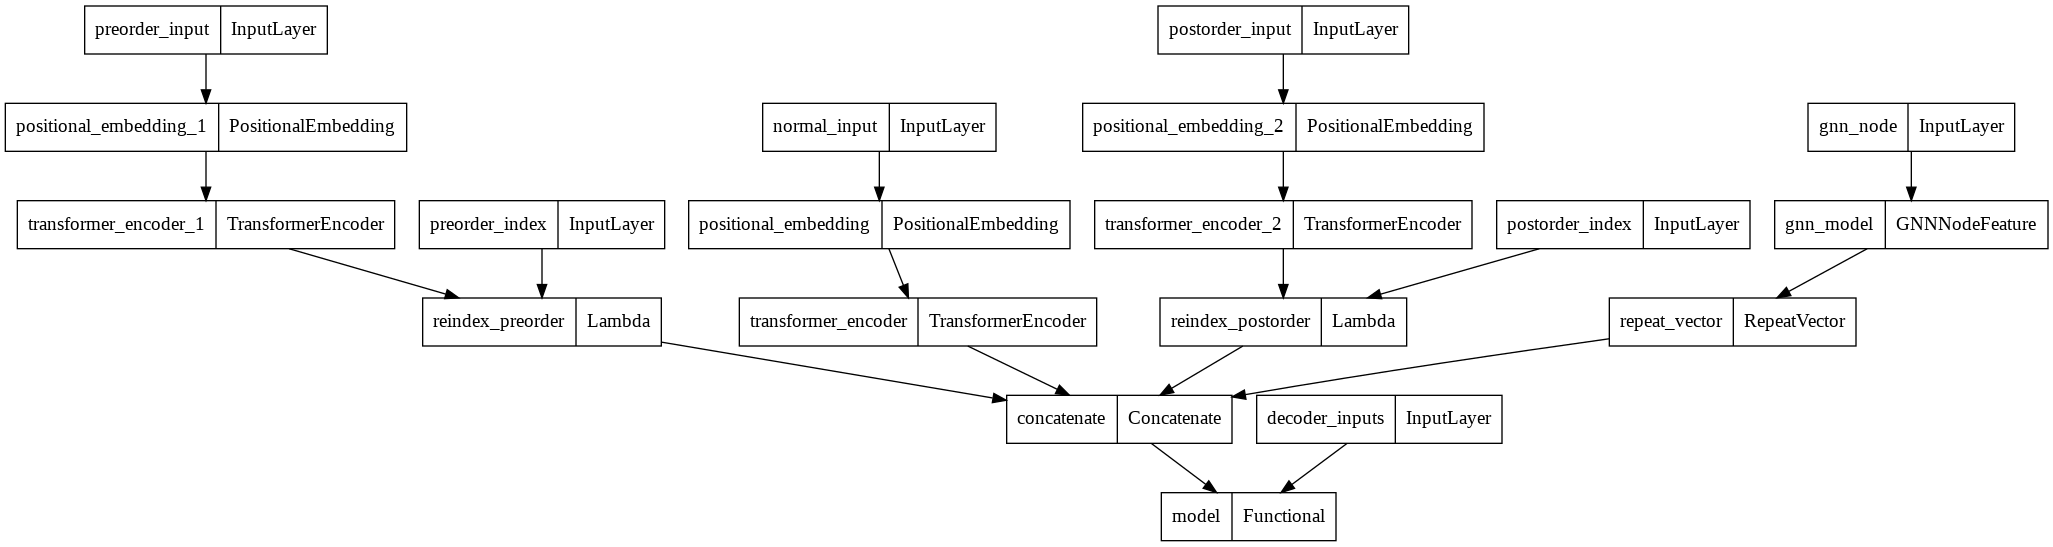

In [ ]:
embed_dim = 300
latent_dim = 512
num_heads = 4

inp_layer_normal=Input(shape=(max_length,), batch_size=constant_batch_size, name="normal_input")
inp_layer_pre=Input(shape=(max_length,), batch_size=constant_batch_size, name="preorder_input")
inp_layer_post=Input(shape=(max_length,), batch_size=constant_batch_size, name="postorder_input")
inp_gnn_node_index=Input(shape=(max_length,), batch_size=constant_batch_size, dtype=tf.int32, name="gnn_node")
inp_index_pre=Input(shape=(max_length,2), batch_size=constant_batch_size, dtype=tf.int32, name="preorder_index")
inp_index_post=Input(shape=(max_length,2), batch_size=constant_batch_size, dtype=tf.int32, name="postorder_index")

x1 = PositionalEmbedding(max_length_sr, len(word2ind_source) + 1, embed_dim)(inp_layer_normal)
mid_layer_normal = TransformerEncoder(embed_dim, latent_dim, num_heads)(x1)

x2 = PositionalEmbedding(max_length_sr, len(word2ind_source) + 1, embed_dim)(inp_layer_pre)
mid_layer_pre = TransformerEncoder(embed_dim, latent_dim, num_heads)(x2)

x3 = PositionalEmbedding(max_length_sr, len(word2ind_source) + 1, embed_dim)(inp_layer_post)
mid_layer_post = TransformerEncoder(embed_dim, latent_dim, num_heads)(x3)

mid_layer_pre = Lambda(lambda x: tf.gather_nd(x[0],x[1]), name="reindex_preorder")([mid_layer_pre,inp_index_pre])
mid_layer_post = Lambda(lambda x: tf.gather_nd(x[0],x[1]), name="reindex_postorder")([mid_layer_post,inp_index_post])

gnn_features = gnn_model(inp_gnn_node_index)
gnn_features_for_max_len = tf.keras.layers.RepeatVector(max_length)(gnn_features)

concat_layer = Concatenate(axis=2)([mid_layer_normal,mid_layer_pre,mid_layer_post,gnn_features_for_max_len])

decoder_inputs = keras.Input(shape=(max_length,), dtype="int64", batch_size=constant_batch_size, name="decoder_inputs")
encoded_seq_inputs = keras.Input(shape=(max_length, embed_dim*4), batch_size=constant_batch_size, name="decoder_state_inputs")
x = PositionalEmbedding(max_length_tr, vocab_size_target, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, latent_dim, num_heads)(x, encoded_seq_inputs)
x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size_target, activation="softmax")(x)
decoder = keras.Model([decoder_inputs, encoded_seq_inputs], decoder_outputs)

decoder_outputs = decoder([decoder_inputs, concat_layer])

model = Model([inp_layer_normal,inp_layer_pre,inp_layer_post,inp_index_pre,inp_index_post,inp_gnn_node_index,decoder_inputs], decoder_outputs)

# # Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

print(model.summary())
plot_model(model, to_file='/content/drive/My Drive/Dep_parsingonlyengparseZSTGNN/model.png')

In [ ]:
def shift(lst,vocab_size_h):
    new_list = []
    for sent in lst:
      sent_list=[]
      for p in range(len(sent)-1):
        
        sent_list.insert(p, sent[p+1])
      z=np.zeros((vocab_size_h))
      z[0]=1
      sent_list.append(z)
      new_list.append(sent_list)
      #print("length",len(sent_list))
      #print(sent[p+1].shape)        



    return new_list

In [ ]:
out_shift=shift(X1_h_new_list,vocab_size_target)

In [ ]:
from keras.models import  load_model

filepath = "drive/MyDrive/Dep_parsingonlyengparseZSTGNN/dep_en_zst_25gb/model.h5"

In [ ]:
from numpy.testing import assert_allclose
from keras.models import  load_model
from keras.callbacks import ModelCheckpoint,EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', patience=5)
filepath = "drive/MyDrive/Dep_parsingonlyengparseZSTGNN/dep_en_zst_25gb/model.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [es]
#callbacks_list = [checkpoint]

In [ ]:
from numpy.testing import assert_allclose
from keras.models import  load_model
from keras.callbacks import ModelCheckpoint,EarlyStopping

history=model.fit([np.array(input_set_X1),np.array(input_set_X2),np.array(input_set_X3),np.array(input_set_X4),np.array(input_set_X5),np.array(input_set_X6),np.array(input_set_X1_target)],np.array(out_shift),batch_size=constant_batch_size,epochs=20, verbose=1,callbacks=callbacks_list,validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 91s 10s/step - loss: 3.3011 - val_loss: 2.1598
Epoch 2/20
8/8 [==============================] - 78s 10s/step - loss: 2.6257 - val_loss: 1.9153
Epoch 3/20
8/8 [==============================] - 78s 10s/step - loss: 2.4478 - val_loss: 1.9101
Epoch 4/20
8/8 [==============================] - 79s 10s/step - loss: 2.4098 - val_loss: 1.8786
Epoch 5/20
8/8 [==============================] - 78s 10s/step - loss: 2.3796 - val_loss: 1.8741
Epoch 6/20
8/8 [==============================] - 79s 10s/step - loss: 2.3592 - val_loss: 1.8661
Epoch 7/20
8/8 [==============================] - 79s 10s/step - loss: 2.3338 - val_loss: 1.8512
Epoch 8/20
8/8 [==============================] - 78s 10s/step - loss: 2.3090 - val_loss: 1.8372
Epoch 9/20
8/8 [==============================] - 79s 10s/step - loss: 2.2797 - val_loss: 1.8399
Epoch 10/20
8/8 [==============================] - 78s 10s/step - loss: 2.2485 - val_loss: 1.8148
Epoch 11/20
8/8 [============

In [ ]:
max_decoded_sentence_length = 50

def decode_sequence(input1, input2, input3, input4, input5, input6, input_tar):
    decoded_sentence = "sos"
    for i in range(max_decoded_sentence_length):
        # input_tar_in = np.array([[word2ind_tar[dec_word] for dec_word in decoded_sentence.split(" ")]])
        predictions = model([input1, input2, input3, input4, input5, input6, input_tar])
        sampled_token_index = np.argmax(predictions[0, i, :])
        sampled_token = ind2word_tar[sampled_token_index]
        decoded_sentence += " " + sampled_token

        if sampled_token in ["eos", "<pad>"] and i>5:
            break
    return decoded_sentence

In [ ]:
for word_tar in input_set_X1[0]:
    print(ind2word_source[word_tar], end=" ")

en धृतराष्ट्र उवाच धर्मक्षेत्रे कुरुक्षेत्रे समवेता युयुत्सवः। मामकाः पाण्डवाश्चैव किमकुर्वत सञ्जय।। <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 

In [ ]:
input_set_X1_target[0][:1]

array([9079], dtype=int32)

In [ ]:
for word_tar in input_set_X1_target[0]:
    print(ind2word_tar[word_tar], end=" ")

sos dhrtarastra said o sanjaya what did my men and the sons of pandu do in the kuruksetra the field of righteousness where the entire warring class has assembled oro sanjaya what did the selfish intentions and the intentions born of wisdom do in the human body which is the fieldofduties the repository of the senseorgans and in which all the murderous ones passions and asceticism etc are confronting each other eos 

In [ ]:
ind_ = 0

In [ ]:
decode_sequence(np.array([input_set_X1[ind_]]), np.array([input_set_X2[ind_]]), np.array([input_set_X3[ind_]]), np.array([input_set_X4[ind_]]), np.array([input_set_X5[ind_]]), np.array([input_set_X6[ind_]]), np.array([input_set_X1_target[ind_]]))

[[9079]]


'sos eos'

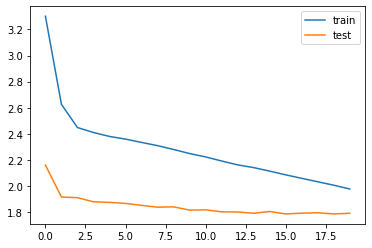

In [ ]:
#ot training history
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
print(history.history['loss'])
print(history.history['val_loss'])

In [ ]:
!pip install -U nltk

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
#from nltk.translate.meteor_score import meteor_score
import nltk
import nltk.translate.gleu_score as gleu
#import nltk.translate.meteor_score.meteor_score

smoother = SmoothingFunction()
def evaluate_model(eng,hin,target):
      actual, predicted = list(),list()
      bb1=0
      bb2=0
      bb3=0
      bb4=0
      gleu_list=[]
      #gleu1=0
      c=0

      for i in range(128):
        raw_target, raw_src, tar  = hin[i],eng[i],target[i]
        tar=tar[0:-1]
        raw_target=raw_target[1:-1]
        raw_src=raw_src[1:-1]
        #tar=[tar]
        #raw_target=[raw_target]
        #raw_src=raw_src[1:-1]
        if i < 128:
		        print('src=%s, target=%s, pred=%s' % (raw_src, raw_target, tar))


  #     actual.append(raw_target)
  #     predicted.append(tar)
  # print(actual)
  # print(predicted)
        # score_ref_a = gleu.sentence_gleu([raw_target], tar)
        # print("Hyp and ref_a are the same: {}".format(score_ref_a))
        # wer_score(raw_target, tar, print_matrix=True)
        try:
          bb1+=(sentence_bleu([raw_target],tar,weights=(1,0,0,0), smoothing_function=smoother.method2)+sentence_bleu(raw_target,tar,weights=(1,0,0,0), smoothing_function=smoother.method7))/2
          print(bb1)
          #meteor+=nltk.translate.meteor_score.meteor_score([raw_target], "tar")
          bb2+=(sentence_bleu([raw_target],tar,weights=(0,1,0,0), smoothing_function=smoother.method2)+sentence_bleu(raw_target,tar,weights=(0,1,0,0), smoothing_function=smoother.method7))/2
          print(bb2)
          bb3+=(sentence_bleu([raw_target],tar,weights=(0,0,1,0), smoothing_function=smoother.method2)+sentence_bleu(raw_target,tar,weights=(0,0,1,0), smoothing_function=smoother.method7))/2
          print(bb3)
          bb4+=(sentence_bleu([raw_target],tar,weights=(0,0,0,1), smoothing_function=smoother.method2)+sentence_bleu(raw_target,tar,weights=(0,0,0,1), smoothing_function=smoother.method7))/2
          print(bb4)
          gleu1=gleu.sentence_gleu([raw_target], tar,min_len=1, max_len=1)
          print(gleu1)
          gleu_list.append(gleu1)
          #z=nltk.translate.chrf_score.chrf_precision_recall_fscore_support([raw_target], tar, 1, beta=3.0, epsilon=1e-16)
          #print(z)
        except ZeroDivisionError:
          pass
        # c+=1
        # if c%4==0:
          # print(c)
          # print(raw_src)
          # print(raw_target)
          # print(tar)
      bleu1=bb1*100/128
      bleu2=bb2*100/128
      bleu3=bb3*100/128
      bleu4=bb4*100/128
      gleu_avg=sum(gleu_list)/len(gleu_list)
      return bleu1,bleu2,bleu3,bleu4,gleu_avg

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import sentence_bleu

references = ['सभी', 'वचन', 'निभायेंगे', ':', 'मंत्री', 'श्री', 'शर्मा']
candidates = ['सभी', 'वचन', 'निभायेंगे', ':', 'मंत्री', 'श्री', 'शर्मा']
score = corpus_bleu(references, candidates)
print(score)

1.8069586474780646e-231


/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.7/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg